# Stat project 5

This time the situation is as follows: you are working in a ready-to-eat food delivery application. A colleague came to you with the results of two tests:

- In the first, we tested the resolution of photos of dishes in the application: users were shown either rectangular or new square
- In the second: the order button was updated, and some users saw the old version, and some saw the new one
A colleague came to you with a request: he looked at the graphs and suggested that there might be differences among the groups. Your task is to help him test hypotheses, draw appropriate conclusions based on statistical tests, and make decisions.

## Tasks

1. Choose the method that you think will fit in the first question.
2. Check if the dispersions within the groups are homogeneous.
3. Test for normal distribution.
4. Compare the averages in the presented groups.
5. Use Tukey's test and determine which groups have statistically significant differences.
6. Make a decision: what pictures will we end up using?
7. Select a method for the second test.
8. Visualize the distribution of events for the control and test groups.
9. Look at the descriptive statistics of events by group and by user segment.
10. Select a formula for the model, run a test.


## Description of data
**5_task_1:**

- id - id of the client in the experiment
- group - in what resolution images were shown (A - rectangular 16:9, B - square, C - rectangular 12:4)
- events - how many dishes were ordered in total for the period

**5_task_2:**

- id - id of the client in the experiment
- segment – ​​segment (high/low)
- group - button type (control - old version, test - new version)
- events - how many dishes were ordered in total for the period

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st

import seaborn as sns 
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [2]:
# for ANOVA
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
# pingouin (i love this lib)
import pingouin as pg

In [3]:
# set for visualization
sns.set(rc={'figure.figsize': (12, 6)}, style="whitegrid")

In [4]:
# load dataset 5_task_1
df_1 = pd.read_csv('./5_task_1.csv')
# load dataset
df_2 = pd.read_csv('./5_task_2.csv')

# Exercise 1
Check if the variances within groups are roughly the same (homogeneous) using Levene's test.

Hint: scipy.stats.levene or pingouin.homoscedasticity

In [5]:
df_1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [6]:
df_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [7]:
df_1.group.unique()

array(['A', 'B', 'C'], dtype=object)

In [5]:
# check homogeneous
pg.homoscedasticity(data=df_1, dv='events', group='group')

,W,pval,equal_var
levene,2.26226,0.104133,True


In [6]:
#or
scipy.stats.levene(df_1.query("group == 'A'").events, 
                   df_1.query("group == 'B'").events, 
                   df_1.query("group == 'C'").events)

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)


**conclusion**
p-value > 0.05, we do not reject the null hypothesis: the variances are homogeneous

# Task 2
Also make sure that the data is distributed normally - in the same way as in the last lesson.

Optional: compare the result with qq-plots. What conclusion can be drawn from the combination of these methods?

In [7]:
pg.normality(data=df_1, dv='events', group='group', method='normaltest') # for large samples

,W,pval,normal
group,,,
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


In [8]:
pg.normality(data=df_1, dv='events', group='group', method='shapiro')
# too many observations. not suitable method (shapiro)

,W,pval,normal
group,,,
A,0.998933,0.000004,False
B,0.999016,0.000011,False
C,0.998920,0.000003,False


<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

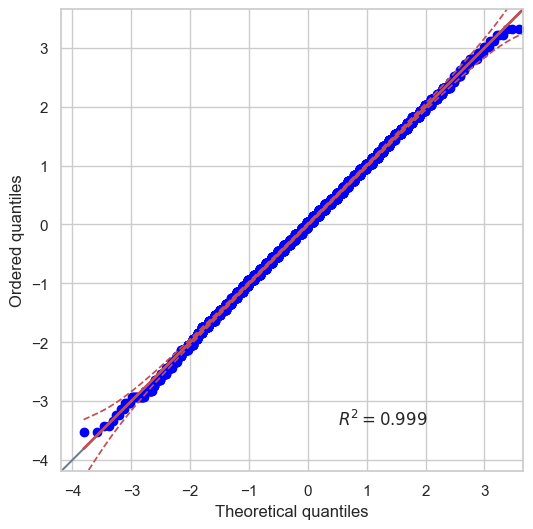

In [9]:
#qq-plot
pg.qqplot(df_1.query("group == 'A'").events)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

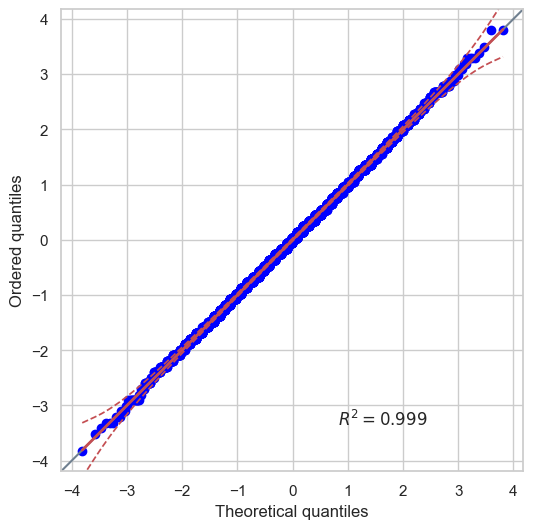

In [11]:
#qq-plot
pg.qqplot(df_1.query("group == 'B'").events)

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

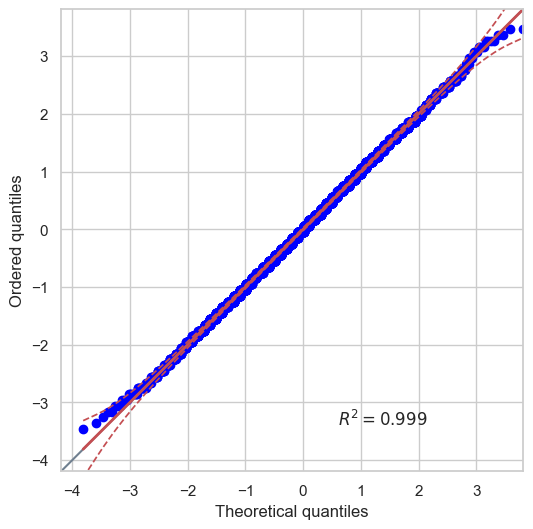

In [10]:
#qq-plot
pg.qqplot(df_1.query("group == 'C'").events)

**Conclusion**
- The distribution of events in group C is normal
- Distribution of events in group B is normal
- The distribution of events in group A is normal

# Task 3
Test

In [12]:
scipy.stats.f_oneway(df_1.query("group == 'A'").events, 
                     df_1.query("group == 'B'").events, 
                     df_1.query("group == 'C'").events)

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

Groups are significantly different from each other

In [13]:
pg.anova(data=df_1, dv='events', between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377



**Conclusion**
To compare means, I use **SINGLE-VARIANT ANALYSIS OF ANOVA**. The value of the statistic is (approx. to the integer) **2886**, and the p-significance level was **0**.

# Task 4
Now use Tukey's test and determine which groups have statistically significant differences.

Optional: try other corrections for multiple comparisons via pingouin. Do they give the same conclusions as Tukey?

(understand which groups differ from each other)

In [14]:
sm.stats.multicomp.pairwise_tukeyhsd(df_1.events, df_1.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.0,7.7038,8.3642,True
A,C,-2.1093,0.0,-2.4395,-1.7791,True
B,C,-10.1433,0.0,-10.4735,-9.8131,True


In [15]:
# variant 2
MultiComp = MultiComparison(df_1['events'], groups=df_1['group'])
print(MultiComp.tukeyhsd().summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034   0.0   7.7038  8.3642   True
     A      C  -2.1093   0.0  -2.4395 -1.7791   True
     B      C -10.1433   0.0 -10.4735 -9.8131   True
----------------------------------------------------


Text(0, 0.5, 'Quantity of purchases')

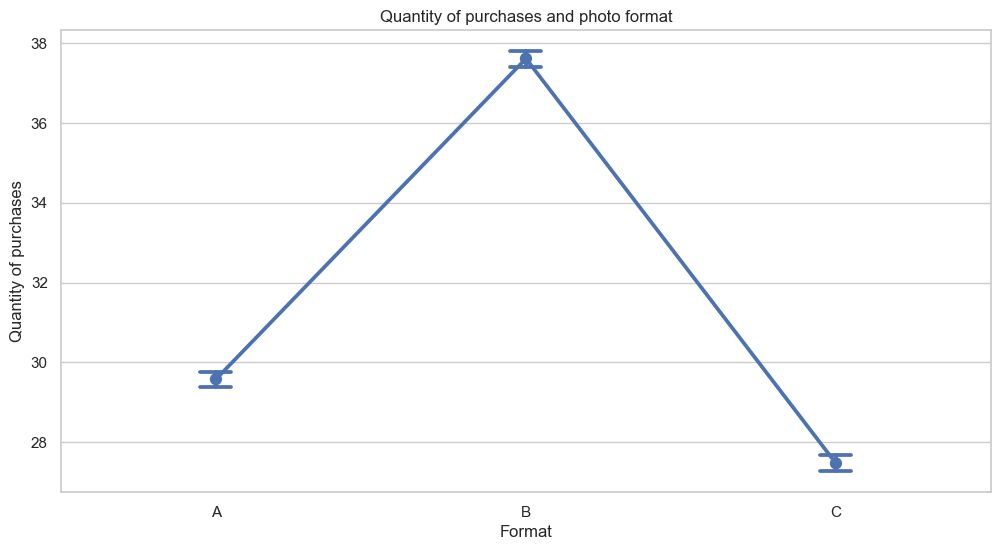

In [19]:
# visualization
sns.pointplot(x='group', y='events', data = df_1, capsize = .1)
plt.title('Quantity of purchases and photo format')
plt.xlabel('Format')
plt.ylabel('Quantity of purchases')

In [20]:

pg.pairwise_tukey(data = df_1, dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.024138


In [21]:
# if you care about inequality of variances
pg.pairwise_gameshowell(data=df_1, dv='events', between='group')
# note: hedges - how much the averages differ in standard deviations

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140920,-57.011134,19987.258491,6.412648e-13,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.141696,14.886135,19995.116233,0.000000e+00,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140062,72.420220,19995.502469,0.000000e+00,1.024138


In [22]:
#доп делает то же самое 
#padjust='bonf' - поправка
pg.pairwise_ttests(data=df_1, dv='events', between='group', padjust='bonf')

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,group,A,B,False,True,-57.011134,19998.0,two-sided,0.000000e+00,0.000000e+00,bonf,inf,-0.806229
1,group,A,C,False,True,14.886135,19998.0,two-sided,7.500262e-50,2.250078e-49,bonf,1.054e+46,0.210514
2,group,B,C,False,True,72.420220,19998.0,two-sided,0.000000e+00,0.000000e+00,bonf,inf,1.024138


**Statistically significant:**
- A и B
- B и C
- A и C

# Task 5
So what images will we end up using?

In [23]:
df_1.groupby('group').agg({'events' : 'sum'})

,events
group,
A,295796
B,376136
C,274703


**Answer:** B – Square

# Task 6
In the second experiment, you want to test how users react to a change in the checkout button format, broken down by customer segment.

Which method is most likely to be useful in this case?

**Answer:** multivariate analysis of variance

# Task 7
Let's look at the data. First, visualize the distribution of events for the control and test groups. Match the distribution graphs and experimental groups:

In [24]:
df_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [25]:
df_2.segment.unique()

array(['high', 'low'], dtype=object)

In [26]:
df_2.group.unique()

array(['test', 'control'], dtype=object)

<Axes: xlabel='events', ylabel='Count'>

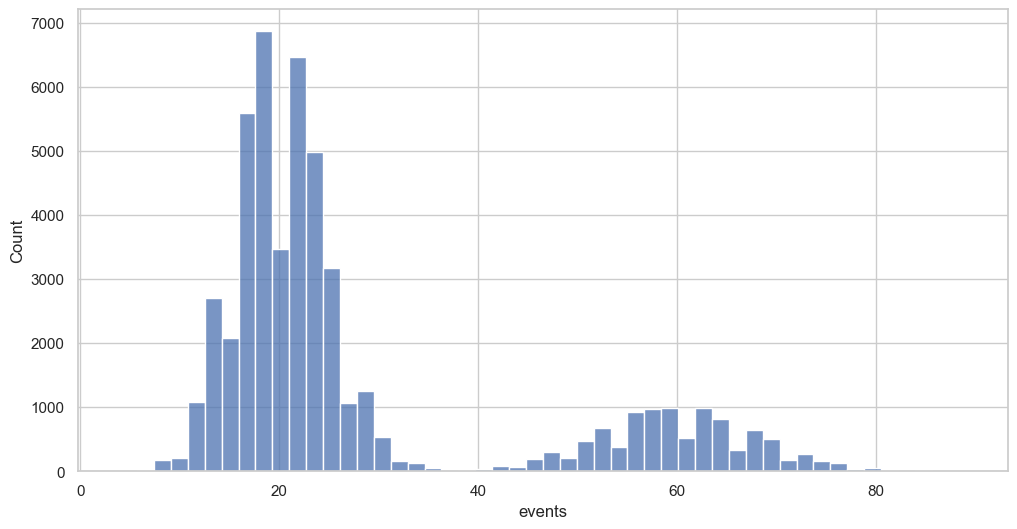

In [27]:
sns.histplot(x=df_2.query("group == 'control'").events, bins=50)

<Axes: xlabel='events', ylabel='Count'>

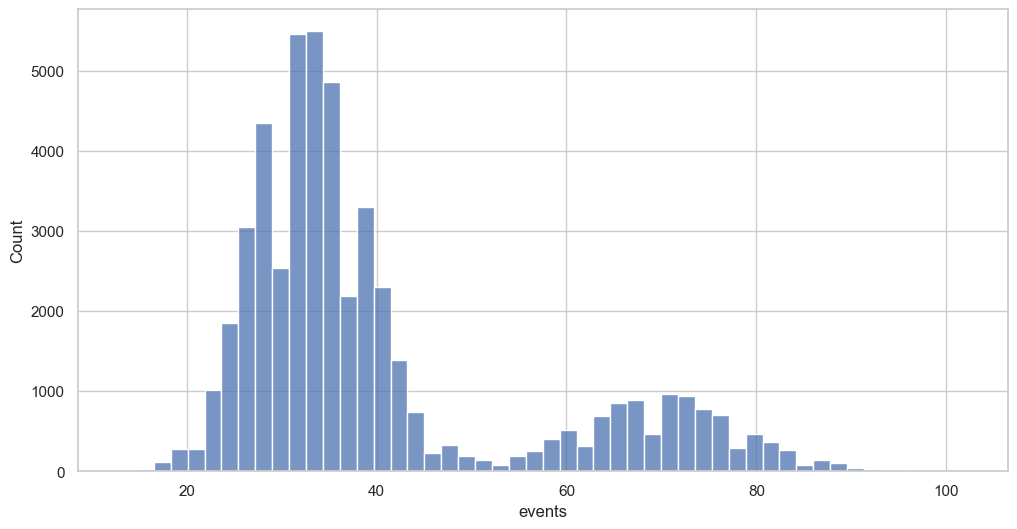

In [29]:
sns.histplot(x=df_2.query("group == 'test'").events, bins=50)

# Task 8

Calculate the mean, median and standard deviation of events by group and by user segment.

As an answer, provide the standard deviation for users in the high segment and the control group, to 2 decimal places.

In [28]:
df_2.groupby(['group', 'segment'], as_index=False).agg({'events' : ['mean', 'median', 'std']}).round(2)

group segment events             
                     mean median   std
0  control    high  59.97   60.0  7.81
1  control     low  20.03   20.0  4.47
2     test    high  69.94   70.0  8.40
3     test     low  33.03   33.0  5.72

In [29]:
df_2.groupby(['group', 'segment'])['events'].describe().T.round(2)

group     control                test          
segment      high       low      high       low
count    10000.00  40000.00  10000.00  40000.00
mean        59.97     20.03     69.94     33.03
std          7.81      4.47      8.40      5.72
min         31.00      4.00     40.00     13.00
25%         55.00     17.00     64.00     29.00
50%         60.00     20.00     70.00     33.00
75%         65.00     23.00     76.00     37.00
max         89.00     41.00    102.00     59.00

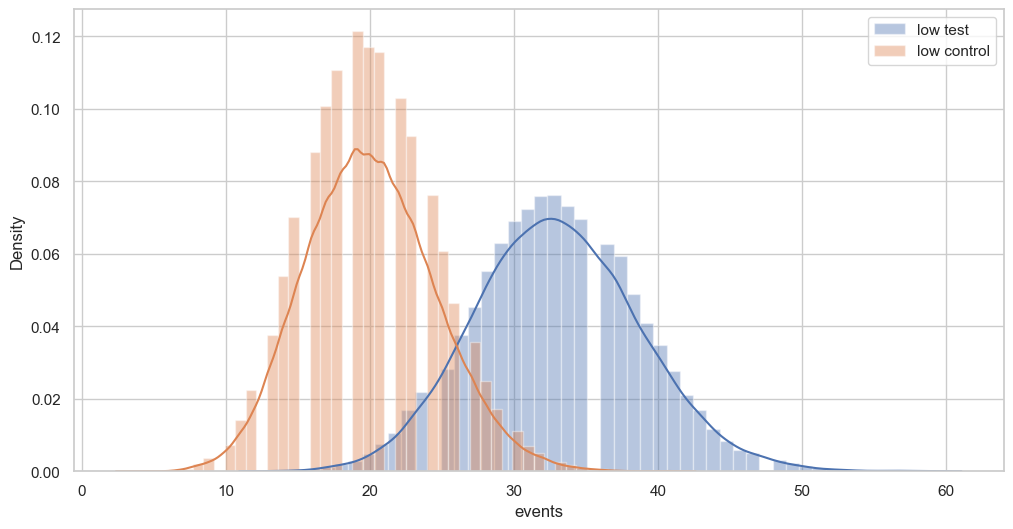

In [30]:
sns.distplot(df_2.query("segment == 'low' & group == 'test'").events, label='low test')
sns.distplot(df_2.query("segment == 'low' & group == 'control'").events, label='low control')
plt.legend()

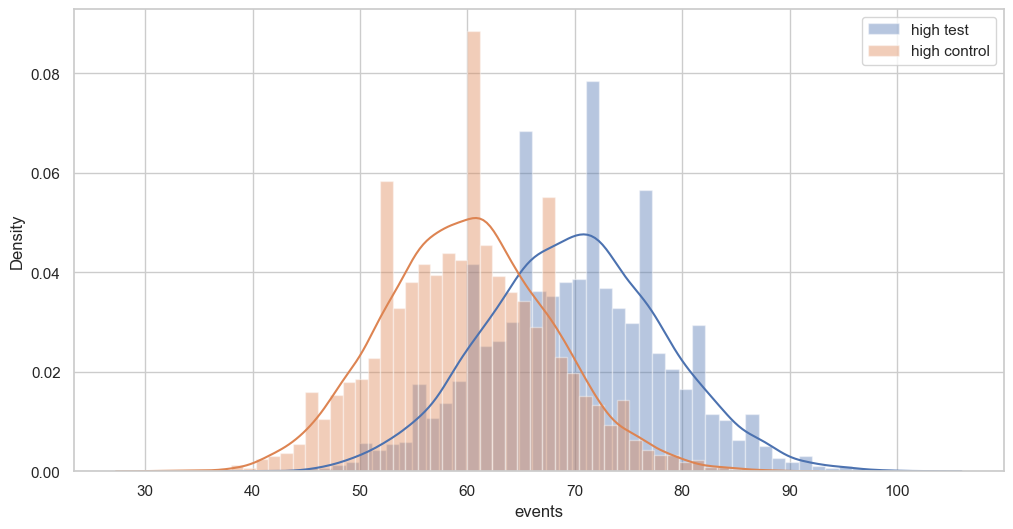

In [31]:
sns.distplot(df_2.query("segment == 'high' & group == 'test'").events, label='high test')
sns.distplot(df_2.query("segment == 'high' & group == 'control'").events, label='high control')
plt.legend()

# Task 9

it remains to choose a formula for the model. Recall that we want to test the effect of several variables - group and segment - on events, with the interaction of factors.

If you use statsmodels, what formula are you using?

**Answer:** events ~ segment + group + segment:group

# Task 10
Run a test (via anova_lm or pg.anova) and then use Tukey's test to see which groups have statistically significant differences.

In this case, for subsequent comparisons between groups, you can perform the following operation: connect the group and segment columns into combination, so that later they can be passed to the groups argument in MultiComparison or pairwise_tukey:

Between which groups were statistically significant differences found? Choose the correct statements:

Note: When interpreting, pay attention to which group is compared to which and how meandiff is calculated.

In [32]:
#statsmodels
model = smf.ols(formula='events ~ segment + group + segment:group', data=df_2).fit()
table = anova_lm(model)

In [33]:
table

,df,sum_sq,mean_sq,F,PR(>F)
segment,1.0,2.362480e+07,2.362480e+07,689756.377484,0.000000e+00
group,1.0,3.837195e+06,3.837195e+06,112031.864119,0.000000e+00
segment:group,1.0,3.664244e+04,3.664244e+04,1069.823273,2.060261e-233
Residual,99996.0,3.424956e+06,3.425093e+01,NaN,NaN


In [34]:
pg.anova(data = df_2, dv='events', between=['group', 'segment'])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN



**Answer:**
1. The difference between the value of the test group of the low segment and the control group of the same segment is approximately 13
2. The difference between control/high and test/high was about 10
3. For both segments, the indicators increased statistically significantly compared to the control group

# Task 11

Visualize the test results and fill in the gaps:

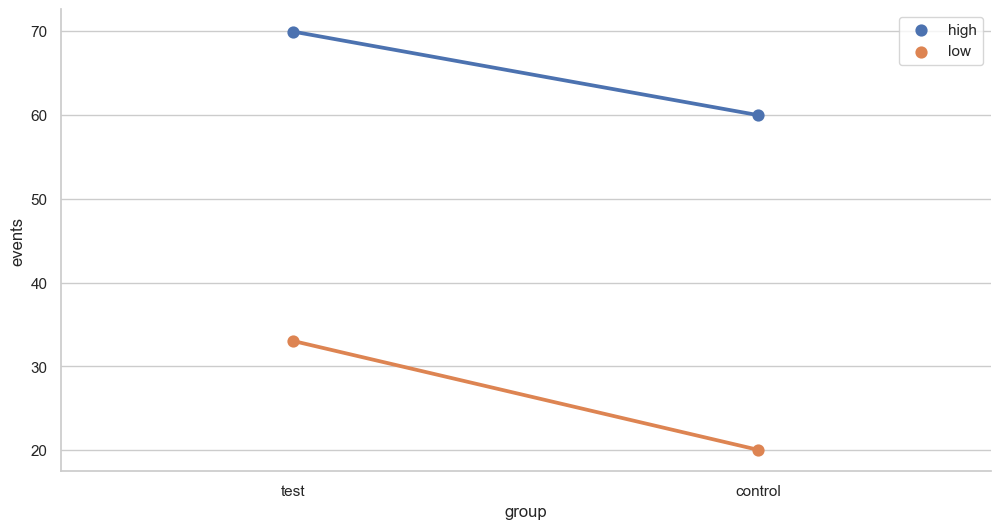

In [35]:
sns.pointplot(x='group' , y='events' , data=df_2, hue='segment')
sns.despine()
plt.legend()

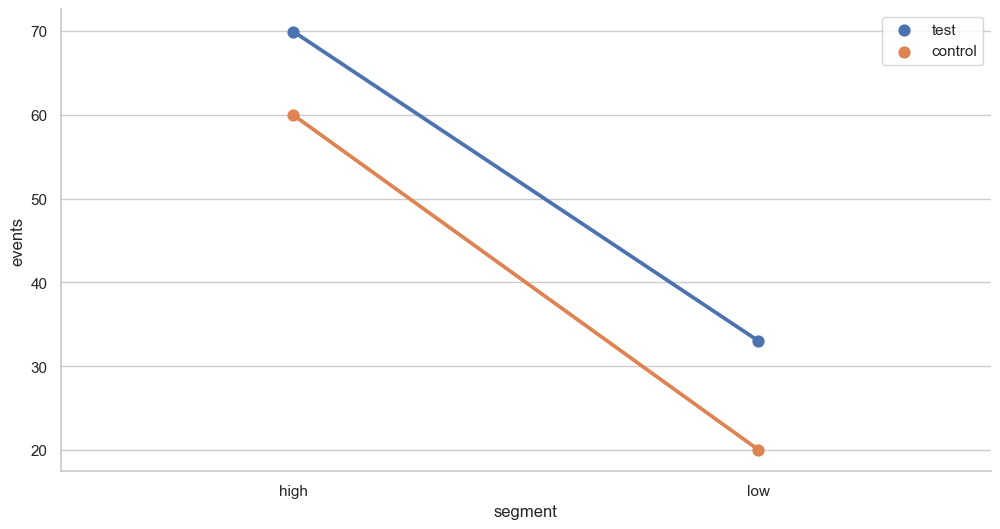

In [36]:
sns.pointplot(x='segment' , y='events' , data=df_2, hue='group')
sns.despine()
plt.legend()

In [37]:
df_2['combination'] = df_2.group + '\\' + df_2.segment
df_2['combination']

0          test\high
1          test\high
2          test\high
3          test\high
4          test\high
            ...     
99995    control\low
99996    control\low
99997    control\low
99998    control\low
99999    control\low
Name: combination, Length: 100000, dtype: object

pg.pairwise_tukey(data=df_2, dv='events', between='combination')

In [38]:
sm.stats.multicomp.pairwise_tukeyhsd(df_2.events, df_2.group).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control,test,12.389,0.0,12.185,12.593,True


In [39]:
sm.stats.multicomp.pairwise_tukeyhsd(df_2.events, df_2.segment).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
high,low,-38.4259,0.0,-38.5583,-38.2935,True



The group factor turned out to be **SIGNIFICANT**, the segment factor - **SIGNIFICANT**, their interaction - **SIGNIFICANT**. Based on the graph, for all groups, the average value of events **INCREASED**, so the solution is: **ROLLING OUT A NEW VERSION**.